(208, 1, 2)
(12, 1, 2)


(228, 1, 2)
(5, 1, 2)


(168, 1, 2)
(16, 1, 2)


(127, 1, 2)
(3, 1, 2)


(4, 1, 2)
(4, 1, 2)




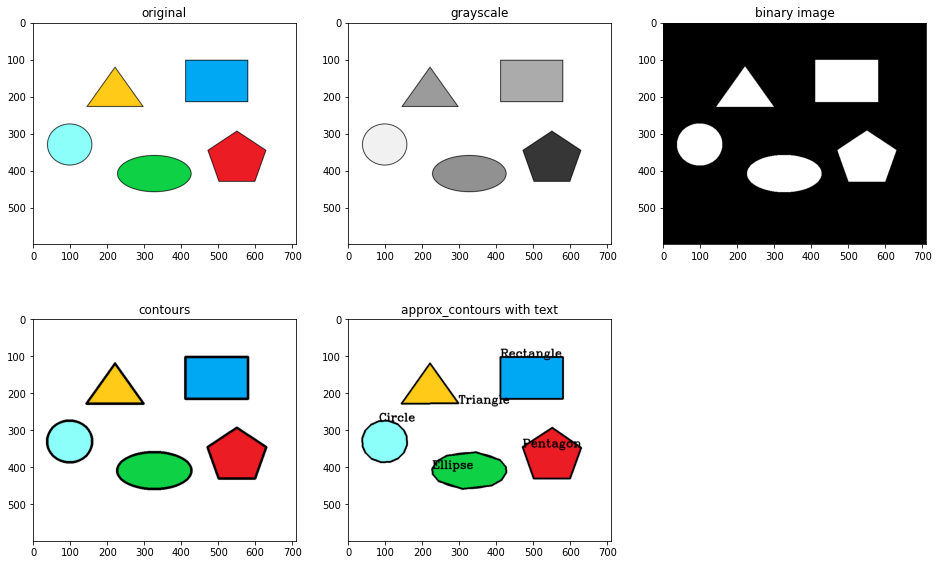

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("simple_shapes.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_contours = img.copy()
img_approx_contours = img.copy()

# Convert to greyscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Convert to binary image by thresholding
_, threshold = cv2.threshold(img_gray, 245, 255, cv2.THRESH_BINARY_INV)
# Find the contours
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Draw the contours
cv2.drawContours(img_contours, contours, -1, (0,0,0), 5)

# For each contour approximate the curve and
# detect the shapes.
for cnt in contours:
    epsilon = 0.01*cv2.arcLength(cnt, True)
    print(cnt.shape)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    print(approx.shape)
    print("\n")
    cv2.drawContours(img_approx_contours, [approx], 0, (0), 3)
    # Position for writing text
    x,y = approx[0][0]

    if len(approx) == 3:
        cv2.putText(img_approx_contours, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    elif len(approx) == 4:
        cv2.putText(img_approx_contours, "Rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    elif len(approx) == 5:
        cv2.putText(img_approx_contours, "Pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    elif 6 < len(approx) < 15:
        cv2.putText(img_approx_contours, "Ellipse", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)
    else:
        cv2.putText(img_approx_contours, "Circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, 0,2)

plt.subplot(2,3,1)
plt.title('original')
plt.imshow(img)

plt.subplot(2,3,2)
plt.title('grayscale')
plt.imshow(img_gray, cmap ='gray')

plt.subplot(2,3,3)
plt.title('binary image')
plt.imshow(threshold, cmap ='gray')

plt.subplot(2,3,4)
plt.title('contours')
plt.imshow(img_contours)

plt.subplot(2,3,5)
plt.title('approx_contours with text')
plt.imshow(img_approx_contours)

plt.gcf().set_size_inches(16, 10)
plt.show()